In [1]:
from wgangp.db_utils import *
from acf_utils import *
from utility import *

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [2]:
run = 51
number = 1750
mpl.rcParams.update({'font.size': 22})
os.mkdir(f'plots/wgangp_{run}')

FileExistsError: [Errno 17] File exists: 'plots/wgangp_51'

In [ ]:
path = f'/scratch/scarpolini/lagrangian/wgangp/runs/{run}/{number}_gen.h5'
gen = load_model(path)
trajs = gen.predict(np.random.normal(0, 1, size=(500000, 100)))
os.mkdir(f'/storage/scarpolini/databases/lagrangian/wgangp/runs/{run}')
np.save(f'/storage/scarpolini/databases/lagrangian/wgangp/runs/{run}/gen_trajs_{number}', trajs)
del trajs

In [3]:
path = f'/storage/scarpolini/databases/lagrangian/wgangp/runs/{run}/gen_trajs_{number}.npy'
#path = f'/scratch/scarpolini/lagrangian/wgangp/runs/{run}/gen_trajs_{number}.npy'
gen = np.load(path)

M = gen.max()
m = gen.min()
print('massimo, minimo: ',M,m)

#db = np.load('/scratch/scarpolini/databases/velocities.npy')[:,:,0]
#M = db.max() 
M = 10.273698864467972
#m = db.min()
m = -9.970374739869616
semidisp = (M-m)/2.
media = (M+m)/2.
gen = gen*semidisp + media
print('veri',M,m)
M = gen.max()
m = gen.min()
print('generati',M,m)

massimo, minimo:  0.9152691 -0.89760697
veri 10.273698864467972 -9.970374739869616
generati 9.416049 -8.933949


In [11]:
gen.shape

(50000, 2000, 1)

# PDF V_x e A_x

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


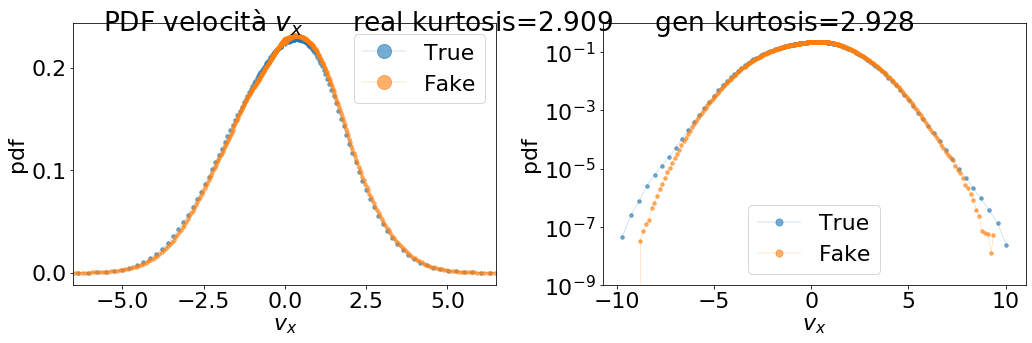

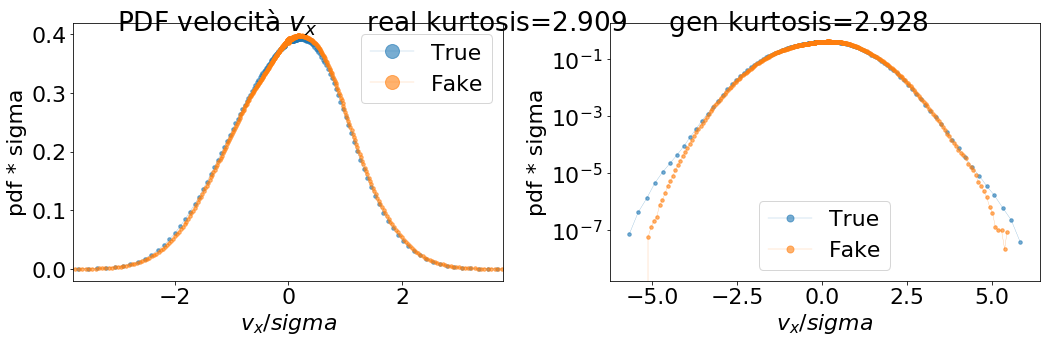

In [4]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen.min(),gen.max(),800,1e-2)
hist, bin_edges = np.histogram(gen.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-6.5,6.5])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


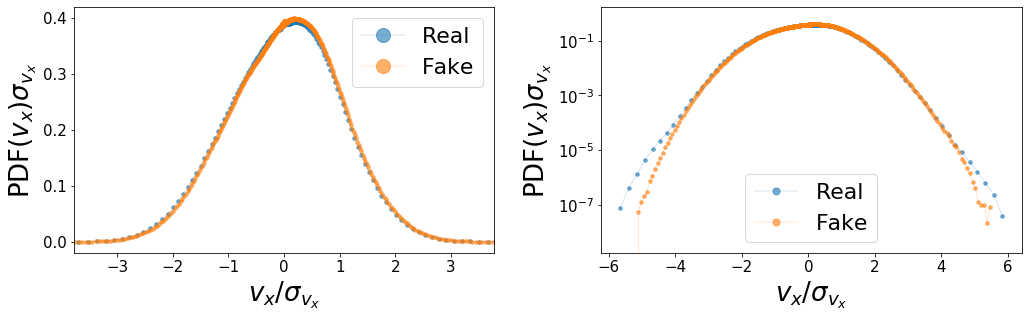

In [144]:
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Real', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Real', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen.min(),gen.max(),800,1e-2)
hist, bin_edges = np.histogram(gen.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]

# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

ax1n.set_xlabel('$v_x / \\sigma_{v_x}$')
ax1n.set_ylabel('PDF$(v_x) \\sigma_{v_x}$')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / \\sigma_{v_x}$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('PDF$(v_x) \\sigma_{v_x}$')
ax2n.legend(markerscale=2)

fign.tight_layout()
fign.savefig(f'lagr_gan_d0_run51', fmt='png', dpi=60)
fign.show()

In [199]:
gm = np.gradient(gen,axis=1)

1.0017092626771908
1.0003783959997048


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


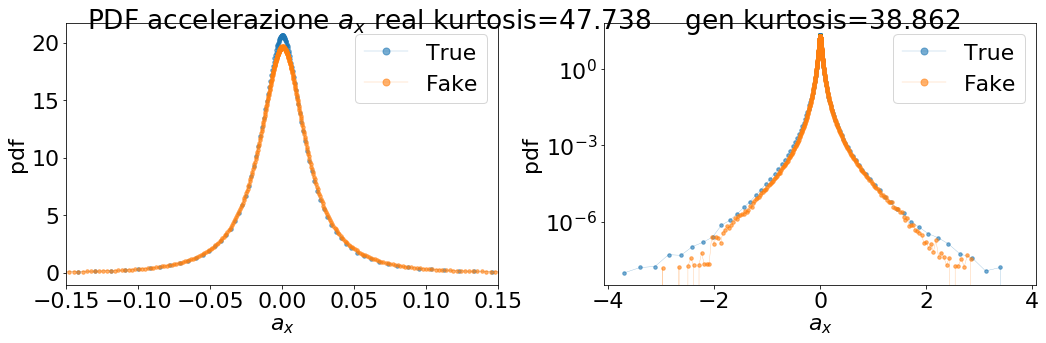

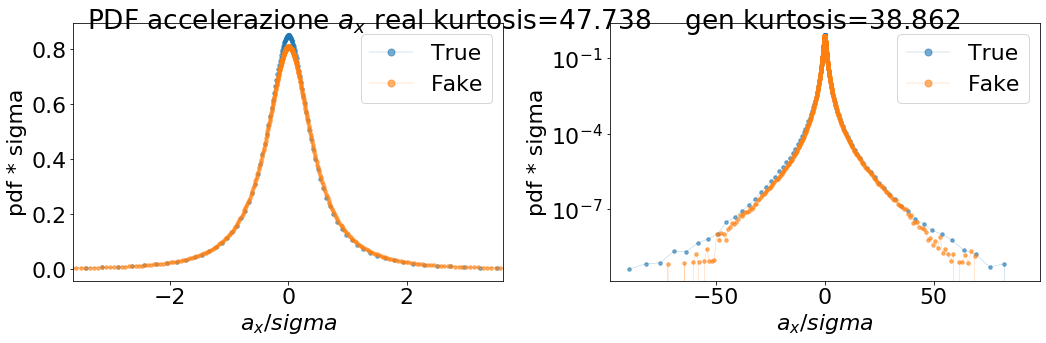

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),800,5.e-4)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.15,0.15])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

1.0017092626771908
1.0003783959997048


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


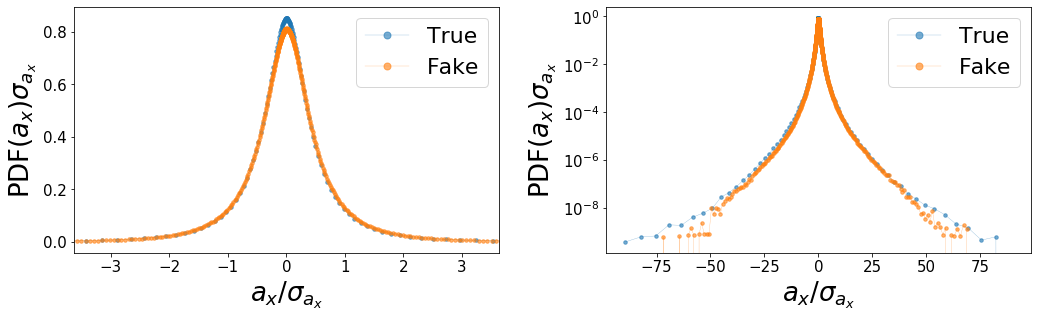

In [201]:
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),800,5.e-4)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / \\sigma_{a_x}$')
ax1n.set_ylabel('PDF$(a_x) \\sigma_{a_x}$')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / \\sigma_{a_x}$')
ax2n.set_ylabel('PDF$(a_x) \\sigma_{a_x}$')
ax2n.set_yscale('log')

fign.tight_layout()
fign.savefig(f'lagr_gan_d1_run51', fmt='png', dpi=60)
fign.show()

In [202]:
gmm = np.gradient(gm,axis=1)

1.0026846043833015
0.993207126337811


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


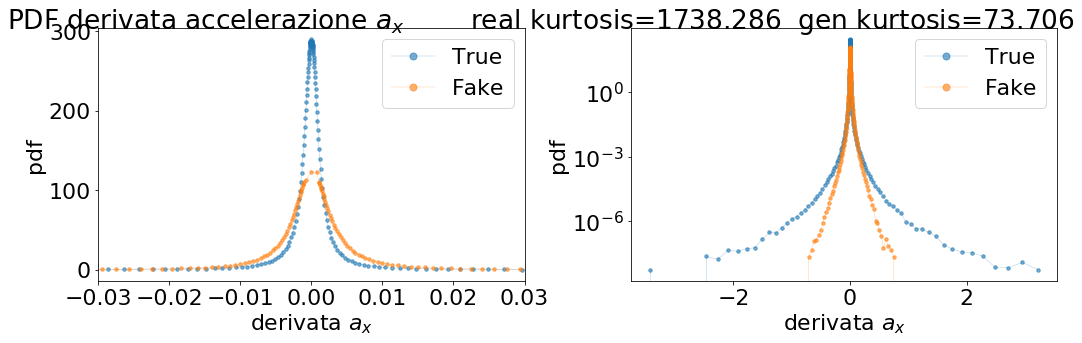

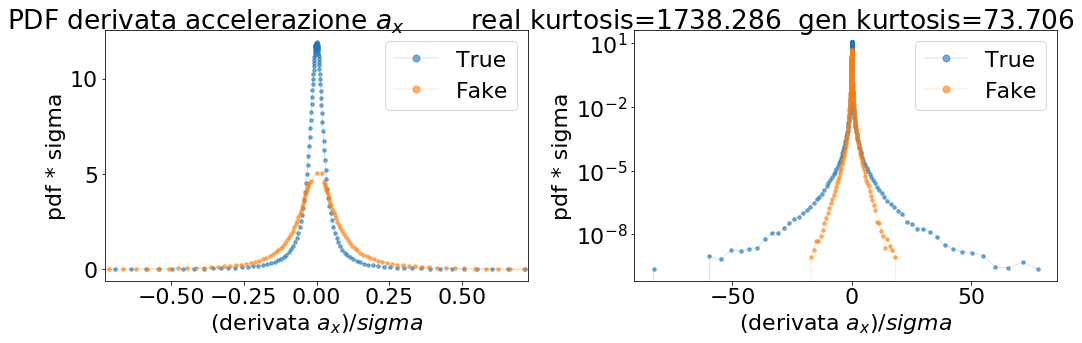

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_aax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
aacc_std = 0.007416499876515975
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gmm.min(),gmm.max(),200,1e-3)
hist, bin_edges = np.histogram(gmm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('derivata $a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.03,0.03])
ax2.legend(markerscale=2)
ax2.set_xlabel('derivata $a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('(derivata $a_x )/ sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.03/acc_std,0.03/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('(derivata $a_x )/ sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

1.0026846043833015
1.005695977239896


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


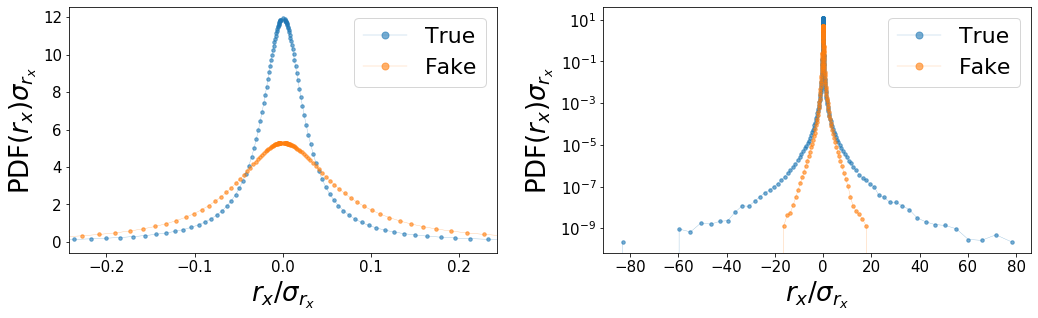

In [205]:
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_aax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
# normalizzate
aacc_std = 0.007416499876515975
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gmm.min(),gmm.max(),200,1e-4)
hist, bin_edges = np.histogram(gmm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$r_x / \\sigma_{r_x}$')
ax1n.set_ylabel('PDF$(r_x) \\sigma_{r_x}$')
ax1n.set_xlim([-0.01/acc_std,0.01/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$r_x / \\sigma_{r_x}$')
ax2n.set_ylabel('PDF$(r_x) \\sigma_{r_x}$')
ax2n.set_yscale('log')

fign.tight_layout()
fign.savefig(f'lagr_gan_d2_run51', fmt='png', dpi=60)
fign.show()

## Calcolo funzioni di struttura Lagrangiane di ordine p: $$ S_p^L(\tau) = <(v_x(t+\tau)-(v_x(t))^p> $$

## Kurtosis o Flatness: $$ K^L(\tau) = \frac{S_4^L(\tau)}{[S_2^L(\tau)]^2} $$

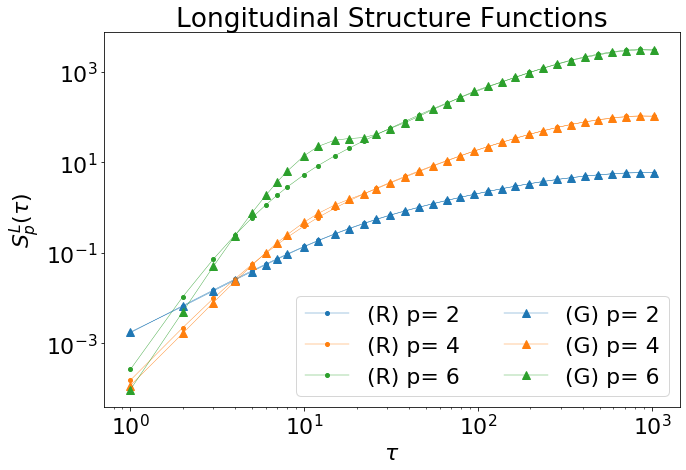

In [9]:
npart = 500000
struct_real = np.load(f"data/real/struct_function_327680_part.npy")
#struct_real = np.load(f"data/real/struct_function_50000_part.npy")
struct_gen = np.load(f"data/wgangp/struct_function_{npart}_part_gen_{run}_{number}.npy")
semidisp = (10.273698864467972-(-9.970374739869616))/2.

mpl.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,7))

plt.title("Longitudinal Structure Functions")
plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],struct_real[:,ii],label="(R) p= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
for ii in range(1,4):
    plt.plot(struct_gen[:,0],struct_gen[:,ii]*semidisp**(ii*2),label="(G) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
#    plt.plot(struct_gen[:,0],struct_gen[:,ii],label="(G) p= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
plt.legend(ncol=2)
plt.xlabel("$\\tau$")
plt.ylabel('$S_p^L(\\tau)$')
plt.tight_layout()
plt.savefig(f"plots/wgangp_{run}/struct_func_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

In [34]:
a = np.round(np.logspace(np.log2(2),np.log2(1000),23,base=2)).astype('int')
for ii in range(len(a)):
    print(a[ii],end=", ")

2, 3, 4, 5, 6, 8, 11, 14, 19, 25, 34, 45, 59, 79, 104, 138, 184, 244, 323, 429, 568, 754, 1000, 

In [53]:
a = list(dict.fromkeys([int(1.2**n) for n in range(0,39)]))
len(a)

34

In [52]:
for ii in range(len(a)):
    print(a[ii],end=", ")

1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 18, 22, 26, 31, 38, 46, 55, 66, 79, 95, 114, 137, 164, 197, 237, 284, 341, 410, 492, 590, 708, 850, 1020, 

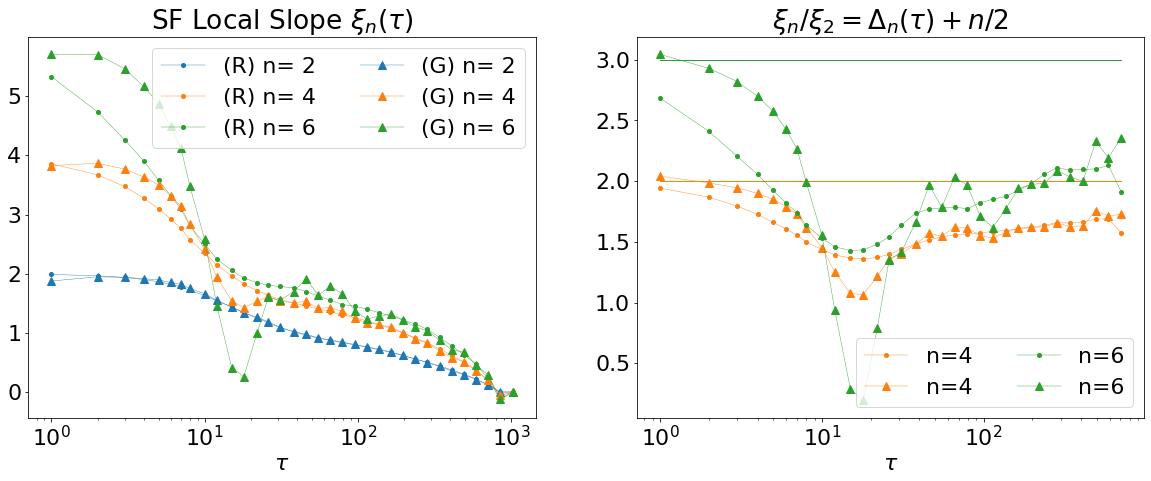

In [10]:
struct_real_log = np.log(struct_real)
struct_gen_log = np.log(struct_gen)
dl_struct_real = np.zeros(shape=struct_real.shape)
dl_struct_gen = np.zeros(shape=struct_gen.shape)
for ii in range(1,4):
    for jj in range(struct_real.shape[0]-1):
        dl_struct_real[jj,ii] = (np.log(struct_real[jj+1,ii]) - np.log(struct_real[jj,ii]))/(np.log(struct_real[jj+1,0])-np.log(struct_real[jj,0]))
        dl_struct_gen[jj,ii] = (np.log(struct_gen[jj+1,ii]*semidisp**(ii*2)) - np.log(struct_gen[jj,ii]*semidisp**(ii*2)))/(np.log(struct_gen[jj+1,0])-np.log(struct_gen[jj,0]))

plt.figure(figsize=(10*2,7))
plt.subplot(1,2,1)
plt.title("SF Local Slope $\\xi_n(\\tau)$")
#plt.yscale('log')
plt.xscale('log')
for ii in range(1,4):
    plt.plot(struct_real[:,0],dl_struct_real[:,ii],label="(R) n= "+str((ii)*2),marker='.',lw=0.4,ms=8, color='C'+str(ii-1))
for ii in range(1,4):
    plt.plot(struct_gen[:,0],dl_struct_gen[:,ii],label="(G) n= "+str((ii)*2),marker='^',lw=0.4,ms=8, color='C'+str(ii-1))
plt.legend(ncol=2)
plt.xlabel("$\\tau$")

#plt.tight_layout()

plt.subplot(1,2,2)
plt.title("$ \\xi_n / \\xi_2 = \\Delta_n(\\tau) + n/2$")
plt.xscale('log')

plt.plot(struct_real[:-2,0],dl_struct_real[:-2,2]/dl_struct_real[:-2,1],label="n=4",marker='.',lw=0.4,ms=8, color='C1')
plt.plot(struct_gen[:-2,0],dl_struct_gen[:-2,2]/dl_struct_gen[:-2,1],label="n=4",marker='^',lw=0.4,ms=8, color='C1')
plt.plot(struct_real[:-2,0], [4./2.]*len(struct_real[:-2,0]),lw=1, color='C1')


plt.plot(struct_real[:-2,0],dl_struct_real[:-2,3]/dl_struct_real[:-2,1],label="n=6",marker='.',lw=0.4,ms=8, color='C2')
plt.plot(struct_gen[:-2,0],dl_struct_gen[:-2,3]/dl_struct_gen[:-2,1],label="n=6",marker='^',lw=0.4,ms=8, color='C2')
plt.plot(struct_real[:-2,0], [6./2.]*len(struct_real[:-2,0]),lw=1, color='C2')


plt.legend(ncol=2)
plt.xlabel("$\\tau$")

plt.savefig(f"plots/wgangp_{run}/struct_func_loc_slope_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

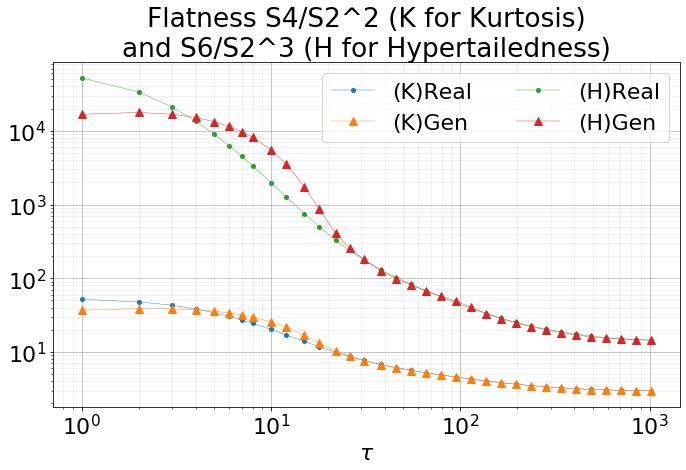

In [11]:
plt.figure(figsize=(10,7))
plt.title("Flatness S4/S2^2 (K for Kurtosis)\nand S6/S2^3 (H for Hypertailedness)")
# plt.yscale('log')
plt.xscale('log')
plt.yscale('log')

plt.plot(struct_real[:,0],struct_real[:,2]/struct_real[:,1]**2.,marker='.', label="(K)Real", lw=0.4,ms=8,color='C0')
plt.plot(struct_gen[:,0],struct_gen[:,2]/struct_gen[:,1]**2.,marker='^', label="(K)Gen",lw=0.4,ms=8,color='C1')
#plt.plot(struct_real_more[:,0],[3.]*len(struct_real_more[:,0]),label="Gaussian")

plt.plot(struct_real[:,0],struct_real[:,3]/struct_real[:,1]**3.,marker='.', label="(H)Real", lw=0.4,ms=8,color='C2')
plt.plot(struct_gen[:,0],struct_gen[:,3]/struct_gen[:,1]**3.,marker='^', label="(H)Gen",lw=0.4,ms=8,color='C3')

#plt.ylabel("$K(\\tau)$")
plt.xlabel("$\\tau$")
plt.legend(ncol=2)
plt.grid(which='minor', alpha=0.2)
plt.grid(which='major', alpha=0.9)
plt.tight_layout()
plt.savefig(f"plots/wgangp_{run}/struct_func_flatness_comp_gen_{run}_{number}",fmt="png",dpi=60)
plt.show()

# ACF_x

calcolo nuove acf


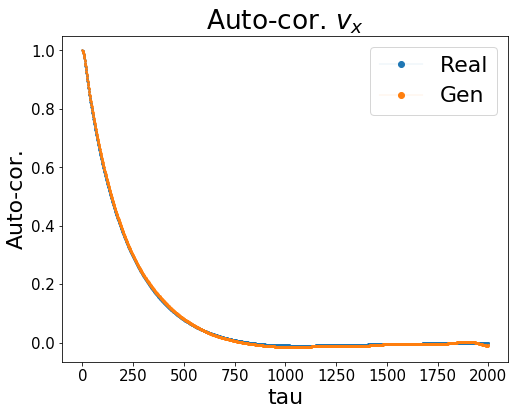

In [44]:
mean = np.load('../databases/velocities_acf_mean_and_std.npy')[0,:,0]
plt.figure(figsize=(8,6))
plt.plot(mean, label='Real')
try: 
    acfg = np.load(f'data/acf_x_gen_{run}_{number}.npy')
    print('acf found')
except:
    print("calcolo nuove acf")
    acfg = acf_x(gen,npart=50000)
    np.save(f'data/acf_x_gen_{run}_{number}',acfg)

plt.plot(acfg, label='Gen')
plt.title('Auto-cor. $v_x$')
#plt.xlim([0,1000])
plt.xlabel('tau')
plt.legend()
plt.ylabel('Auto-cor.')
plt.savefig(f'plots/wgangp_{run}/gan_test_acfx_{run}_{number}.png', fmt='png', dpi=60)
plt.show()

# CALCOLO ACF SECONDO LA SUBROUTINE IN FORTRAN

In [4]:
db = np.load('../databases/velocities.npy')[:,:,0:1]

In [6]:
number = 1000
acfr = compute_acf(db,npart=number)
acfg = compute_acf(gen,npart=number)

Taken partial dataset, 1000 trajectories


NameError: name 'ou' is not defined

In [ ]:
acfr_m = acfr.mean(axis=0)
acfr_std = acfr.std(axis=0) / np.sqrt(number)
acfg_m = acfg.mean(axis=0)
acfg_std = acfg.std(axis=0) / np.sqrt(number)

In [ ]:
acfr.shape

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  del sys.path[0]


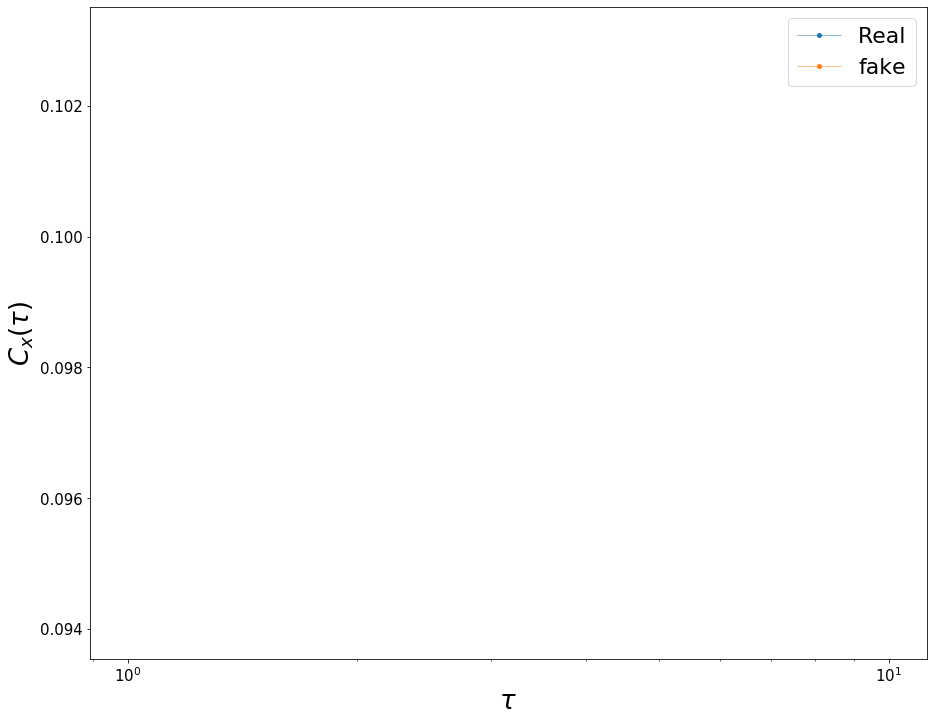

In [215]:
plt.plot(acfr_m, label='Real')
plt.plot(acfg_m, label='fake')
#l, caps, c = plt.errorbar(np.arange(0,2000), acfr_m, acfr_std, lw=0, marker='^', ms=4, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Real')
#for cap in caps:
#    cap.set_marker("_")
#    
#l, caps, c = plt.errorbar(np.arange(0,2000), acfg_m, acfg_std, lw=0, marker='^', ms=4, elinewidth=1, uplims=True, lolims=True, capsize=2, label='Fake')
#for cap in caps:
#    cap.set_marker("_")

#plt.plot(acfg, label='Fake')
#plt.xlim([1,2000])
plt.xscale('log')
plt.ylabel('$ C_x(\\tau)$')
plt.xlabel('$\\tau$')
plt.legend()

#plt.subplot(1,2,2)
#plt.plot(bins, hist, label='Real')
#plt.plot(binsg, histg, label='Fake')
##plt.xlim([1,2000])
##plt.xscale('log')
#plt.ylabel('PDF($\\tau| C_x(\\tau)=0.5$)')
#plt.xlabel('$\\tau$')
#plt.legend()

#plt.savefig(f'lorenz_gan_acf_et_run{run}', fmt='png', dpi=60)
plt.show()

# ACF$_x$ accelerazione

calcolo nuove acf


<Figure size 576x432 with 0 Axes>

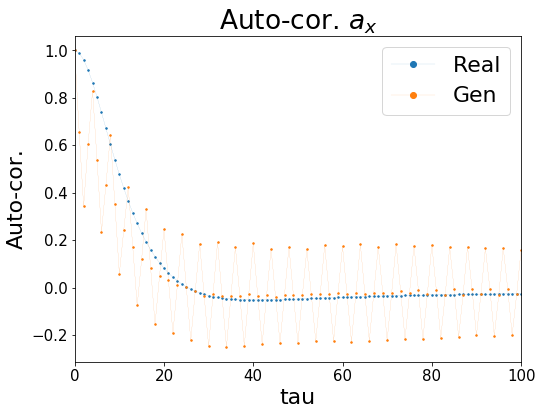

In [45]:
plt.figure(figsize=(8,6))
mean = np.load('../databases/accelerations_acf_mean_and_std.npy')[0,:,0]

plt.figure(figsize=(8,6))
plt.plot(mean, label='Real')
try: 
    acfg = np.load(f'data/acf_x_gen_{run}_{number}_acc.npy')
    print('acf found')
except:
    print("calcolo nuove acf")
    acfg = acf_x(gm,npart=50000)
    np.save(f'data/acf_x_gen_{run}_{number}_acc',acfg)

plt.plot(acfg, label='Gen')
plt.title('Auto-cor. $a_x$')
plt.xlim([0,100])
plt.xlabel('tau')
plt.legend()
plt.ylabel('Auto-cor.')
plt.savefig(f'plots/wgangp_{run}/gan_test_acfx_acc_{run}_{number}.png', fmt='png', dpi=60)
plt.show()

# Exit time

In [16]:
paths = [f'data/acf_x_gen_{run}_{number}.npy']
try: exit_times = np.load(f'data/exit_time_x_gen_{run}_{number}.npy')
except:
    exit_times = gen_exit_time(run, number, 0.5)
    np.save(f'data/exit_time_x_gen_{run}_{number}',exit_times)

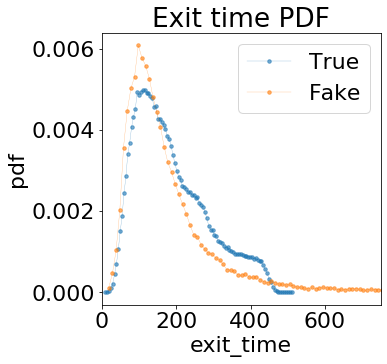

In [17]:
plt.figure(figsize=(5,5))
#exit_times = np.load('../databases/exit_time_0.50_lagrangian.npy')
#hist, bin_edges = np.histogram(exit_times,bins=100, density=True)
#print(save_pdf(bin_edges, hist, 'data/pdf_exit_time'))
hist, bin_edges = load_pdf('data/pdf_exit_time')
plt.plot(bin_edges, hist, alpha=0.6, label='True', marker='.', lw=0.3, ms=7)
hist, bin_edges = np.histogram(exit_times, bins=200, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
bin_edges = bin_edges[:-1]
plt.plot(bin_edges, hist, alpha=0.6, label='Fake', marker='.', lw=0.3, ms=7)
#plt.yscale('log')
plt.title('Exit time PDF')
plt.ylabel('pdf')
plt.xlabel('exit_time')
plt.xlim([0,750])
plt.legend()
plt.savefig(f'plots/wgangp_{run}/gan_test_exit_time_{run}_{number}.png',fmt='png',dpi=100)

# Plot Traiettorie Generate e Reali

In [87]:
db = np.load('../databases/velocities.npy')[:,:,0]

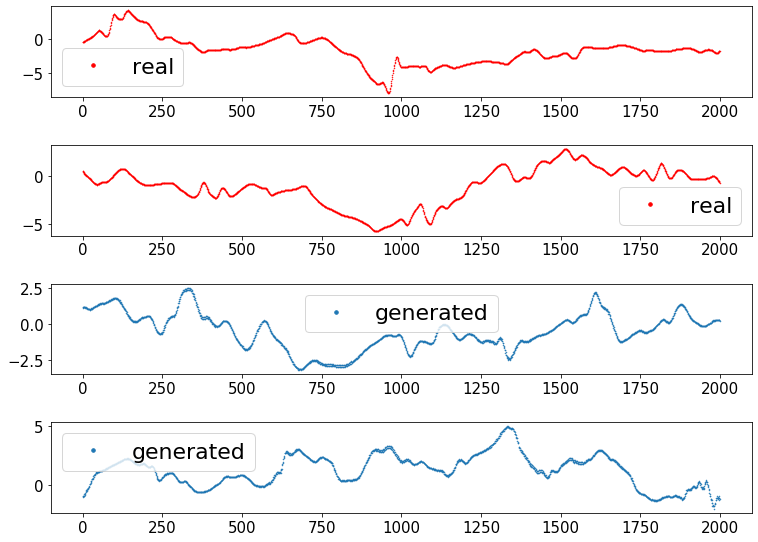

In [73]:
idx1 = np.random.randint(0, db.shape[0], 2)
idx2 = np.random.randint(0, gen.shape[0], 2)
trajs = db[idx1]
gen_trajs = gen[idx2]
plt.figure(figsize=(11, 2*len(trajs)+2*len(gen_trajs)))
plt.title('esempi di velocità vere e generate')

for i, traj in enumerate(trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1)
    plt.plot(traj, color='red', label='real', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(trajs)+len(gen_trajs), 1, i+1+len(trajs))
    plt.plot(traj, label='generated', lw=0, marker='.',ms=1)
    plt.legend(markerscale=7)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_trajs_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

[ 47716 495698  60785 247196 222328 348915 240834 238001 209529 462623]


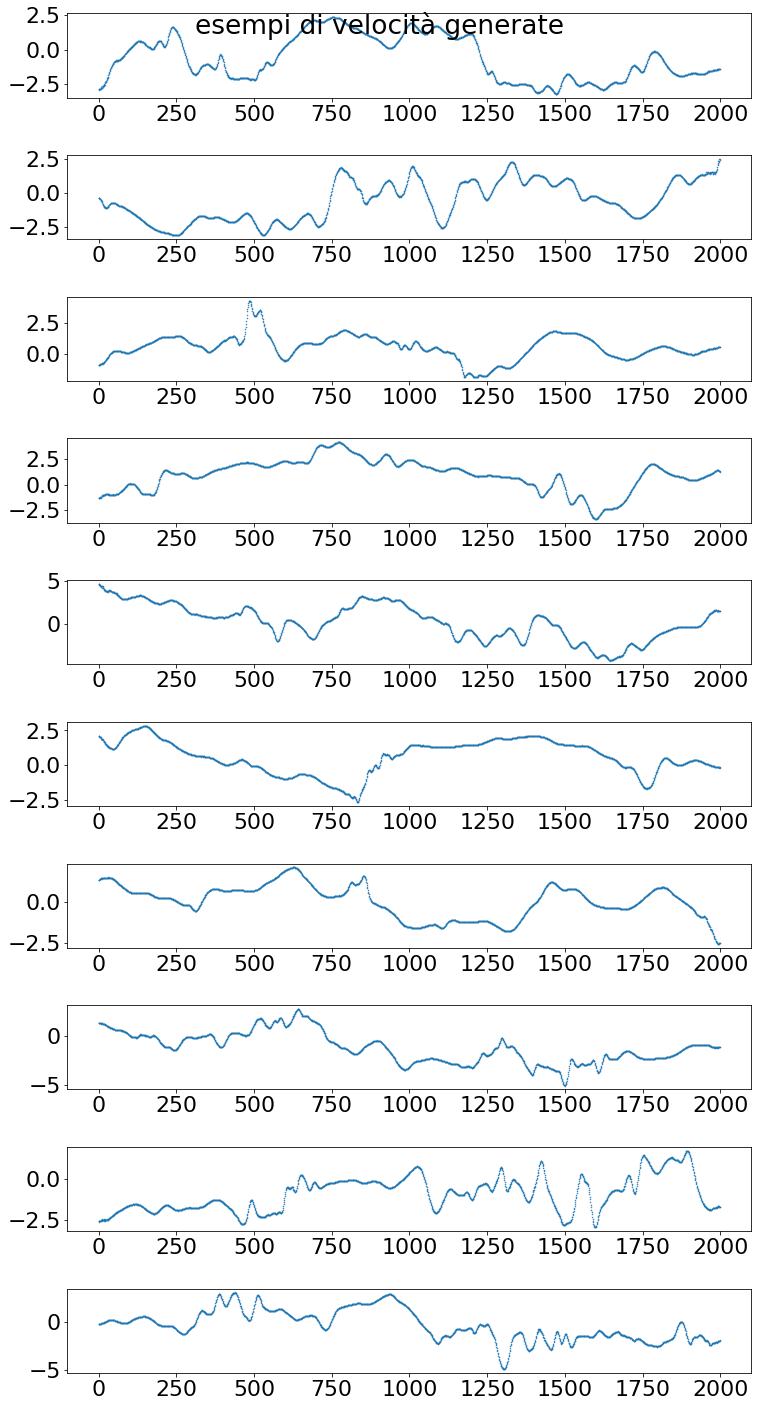

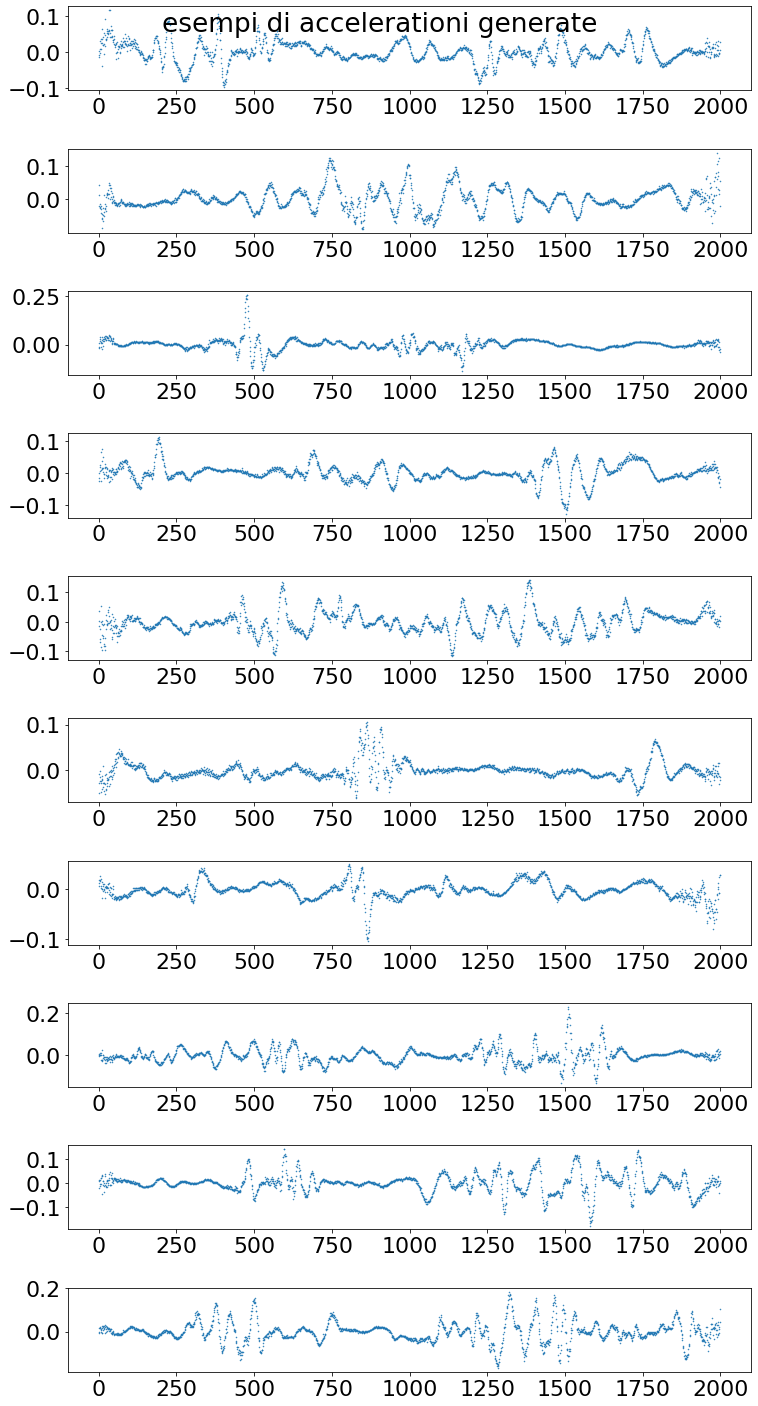

In [12]:
idx2 = np.random.randint(0, gen.shape[0],10)
print(idx2)
gen_trajs = gen[idx2]
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di velocità generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

gen_trajs = np.gradient(gen_trajs, axis=1)
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di accelerationi generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_acc_{run}_{number}.png', fmt='png', dpi=100)
plt.show()

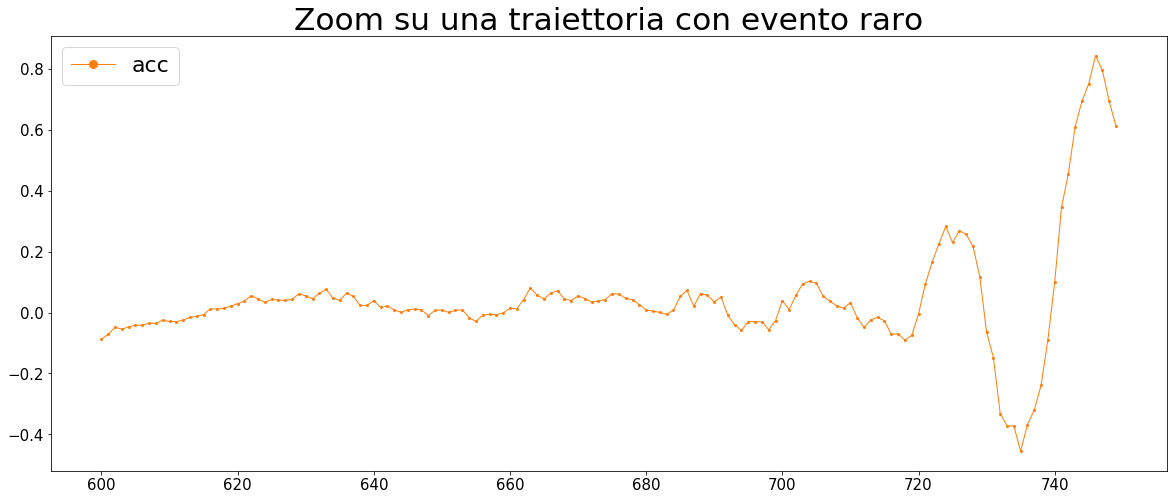

In [38]:
start=600
end=750
plt.title("Zoom su una traiettoria con evento raro")
#plt.plot(np.arange(start,end),gen[179128,start:end],label="vel")
plt.plot(np.arange(start,end),np.gradient(gen[179128,start:end],axis=0),label="acc",color="C1")
plt.legend()
plt.show()

In [12]:

plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

# Provo a smoothare le velocità

In [59]:
#vel = gen[36350,:,0]
vel = gen[179128,:,0]
prova3 = np.zeros(shape=(2000))
prova3[0] = vel[0]
prova3[-1] = vel[-1]

prova5 = np.zeros(shape=(2000))
prova5[0] = vel[0]
prova5[1] = (vel[0] + vel[1] + vel[2])/3.
prova5[-1] = vel[-1]
prova5[-2] = (vel[-1] + vel[-2] + vel[-3])/3.

prova7 = np.zeros(shape=(2000))
prova7[0] = vel[0]
prova7[1] = (vel[0] + vel[1] + vel[2])/3.
prova7[2] = (vel[0] + vel[1] + vel[2] + vel[3] + vel[4])/5.
prova7[-1] = vel[-1]
prova7[-2] = (vel[-1] + vel[-2] + vel[-3])/3.
prova7[-3] = (vel[-1] + vel[-2] + vel[-3] + vel[-4] + vel[-5])/5.

for tt in range(1,gen.shape[1]-1):
    prova3[tt] = (vel[tt-1] + vel[tt] + vel[tt+1]) / 3.
    
for tt in range(2,gen.shape[1]-2):
    prova5[tt] = (vel[tt-2] + vel[tt-1] + vel[tt] + vel[tt+1] + vel[tt+2]) / 5.
    
for tt in range(3,gen.shape[1]-3):
    prova7[tt] = (vel[tt-3] + vel[tt-2] + vel[tt-1] + vel[tt] + vel[tt+1] + vel[tt+2] + vel[tt+3]) / 7.
    
delta = 0.4
#prova3 = prova3 - delta
#prova5 = prova5 - 2*delta
#prova7 = prova7 - 3*delta

In [68]:
def smooth(x,window_len=5,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    #if x.ndim != 1:
    #    raise ValueError, "smooth only accepts 1 dimension arrays."
#
    #if x.size < window_len:
    #    raise ValueError, "Input vector needs to be bigger than window size."
#
#
    #if window_len<3:
    #    return x
#
#
    #if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
    #    raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[(window_len//2):-(window_len//2)]

prova7 = smooth(vel,5)

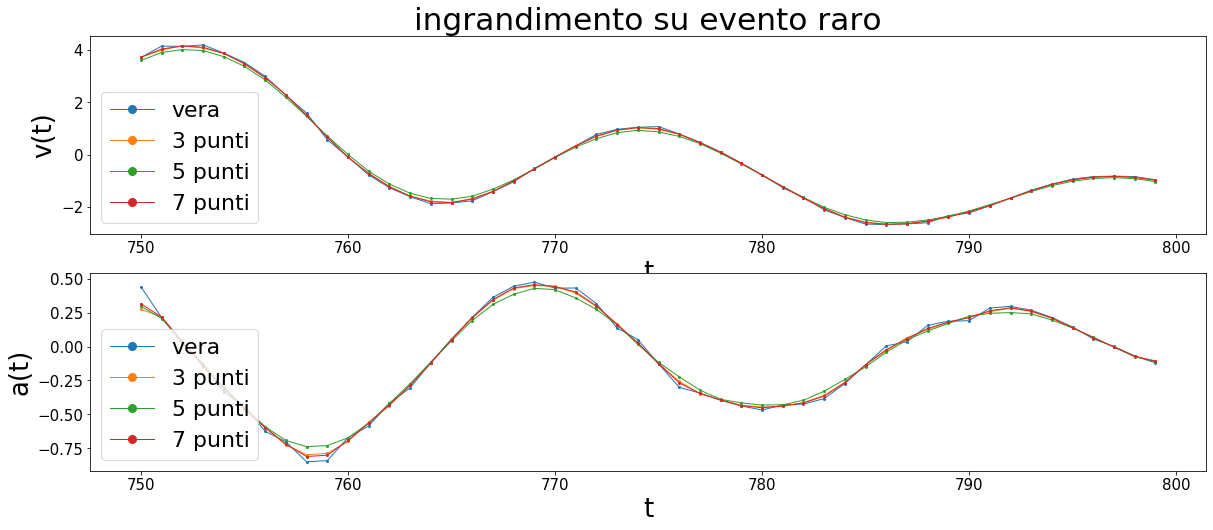

In [70]:
start=750
#start=650
end=start+50
plt.subplot(2,1,1)
#plt.title("ingrandimento su parte piatta")
plt.title("ingrandimento su evento raro")
plt.plot(np.arange(start,end),vel[start:end],label="vera")
plt.plot(np.arange(start,end),prova3[start:end],label="3 punti")
plt.plot(np.arange(start,end),prova5[start:end],label="5 punti")
plt.plot(np.arange(start,end),prova7[start:end],label="7 punti")
plt.ylabel("v(t)")
plt.xlabel("t")
plt.legend()
plt.subplot(2,1,2)
plt.plot(np.arange(start,end),np.gradient(vel[start:end]),label="vera")
plt.plot(np.arange(start,end),np.gradient(prova3[start:end]),label="3 punti")
plt.plot(np.arange(start,end),np.gradient(prova5[start:end]),label="5 punti")
plt.plot(np.arange(start,end),np.gradient(prova7[start:end]),label="7 punti")
plt.ylabel("a(t)")
plt.xlabel("t")
plt.legend()
#plt.savefig("medie_a_x_punti",fmt="png",dpi=100)
plt.show()

In [ ]:
gen5 = np.zeros(shape=50000)

for part in range(50000):
    
    if part%1000==0: print(part)
    gen5[part,0,0] = gen[part,0,0]
    gen5[part,1,0] = (gen[part,0,0] + gen[part,1,0] + gen[part,2,0])/3.
    gen5[part,-1,0] = gen[part,-1,0]
    gen5[part,-2,0] = (gen[part,-1,0] + gen[part,-2,0] + gen[part,-3,0])/3.

    for tt in range(2,gen.shape[1]-2):
        
        gen5[part,tt,0] = (gen[part,tt-2,0] + gen[part,tt-1,0] + gen[part,tt,0] + gen[part,tt+1,0] + gen[part,tt+2,0]) / 5.
        


In [100]:
gen5 = gen5[0:50000]
np.save(f"wgangp/runs/{run}/gen_trajs_{number}_5punti",gen5)

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


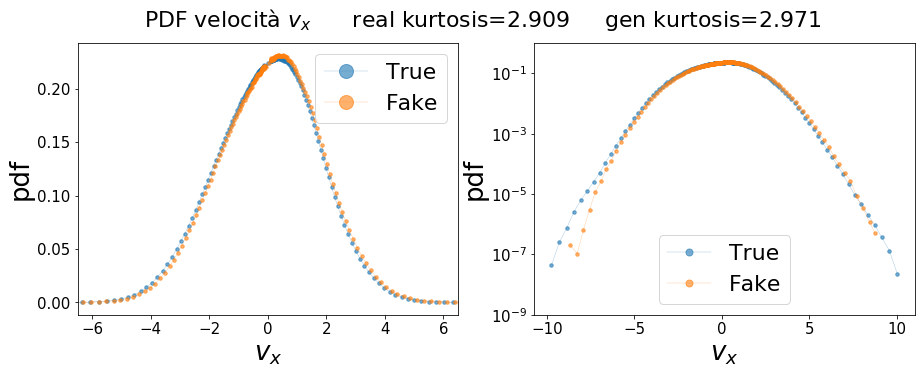

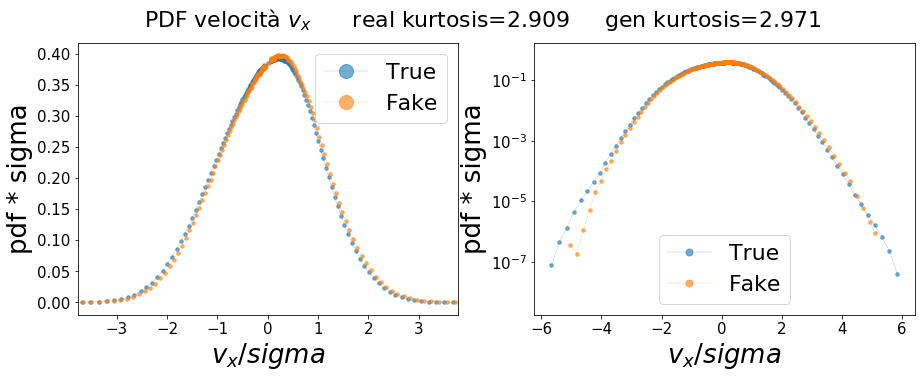

In [101]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen5.min(),gen5.max(),200,1e-1)
hist, bin_edges = np.histogram(gen5.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-6.5,6.5])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

#fig.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

In [102]:
gm = np.gradient(gen5,axis=1)

1.0017092626771908
1.0051709317388708


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


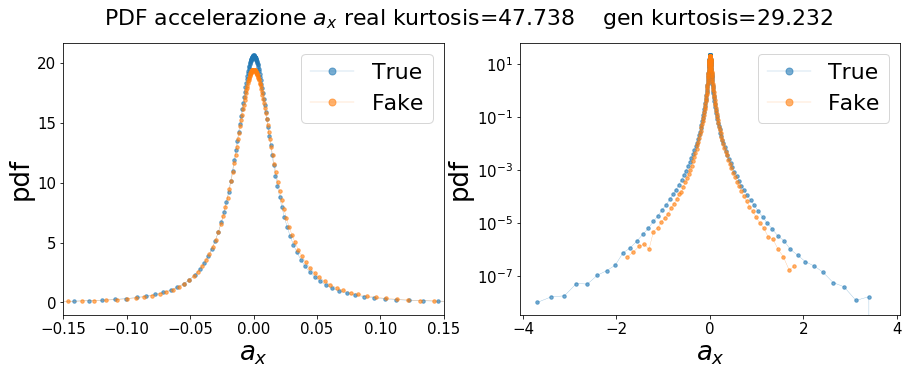

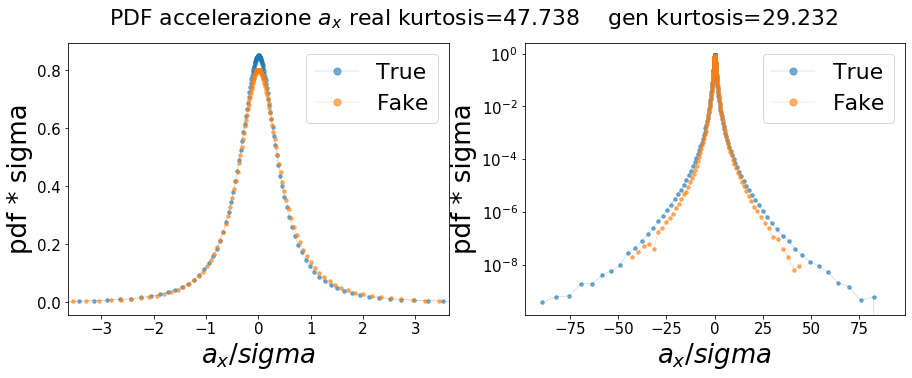

In [103]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),200,1e-3)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.15,0.15])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

#fig.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

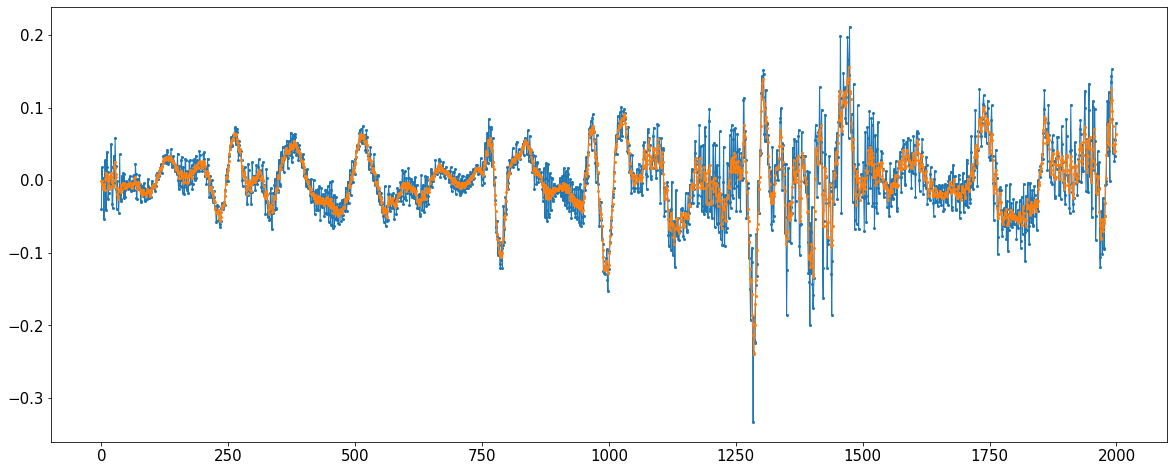

In [107]:
plt.plot(np.gradient(gen[0],axis=0))
plt.plot(np.gradient(gen5[0],axis=0))

In [ ]:
gen9 = np.zeros(shape=(500000,2000,1))

for part in range(500000):
    
    if part%1000==0: print(part)
    gen9[part,:,0] = smooth(gen[part,:,0],9,'hanning')

np.save(f"wgangp/runs/{run}/gen_trajs_{number}_media",gen9)

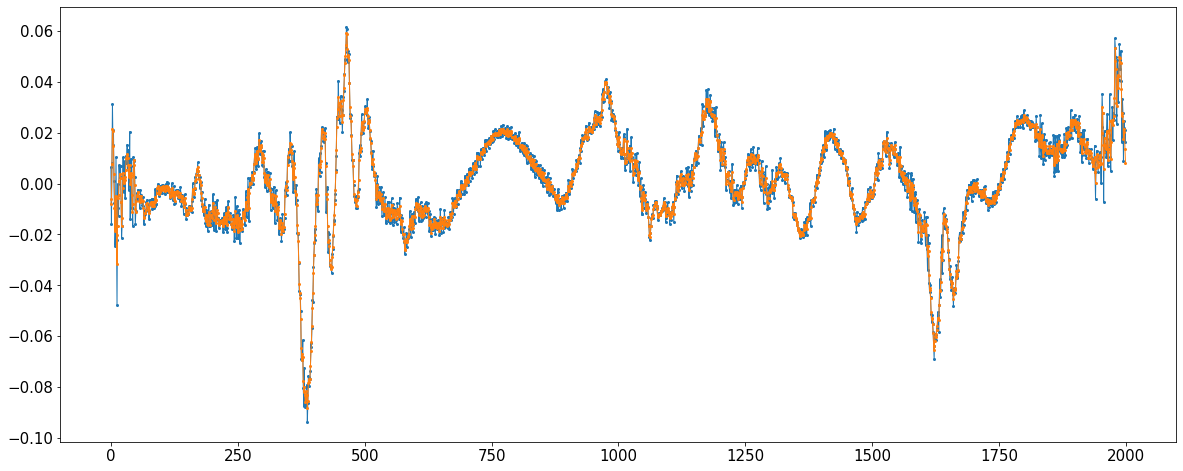

In [72]:
plt.plot(np.gradient(gen[0],axis=0))
plt.plot(np.gradient(gen9[0],axis=0))

In [18]:
gen9[0]

array([[4.20482361],
       [4.20964042],
       [4.22957096],
       ...,
       [1.87740419],
       [1.88071096],
       [1.88255815]])

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


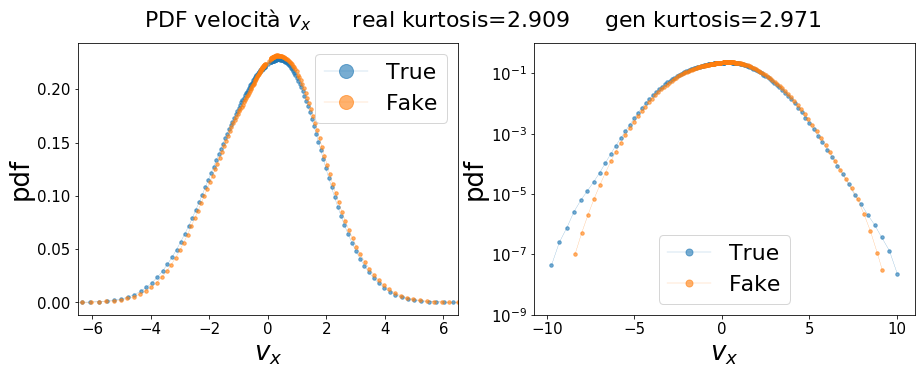

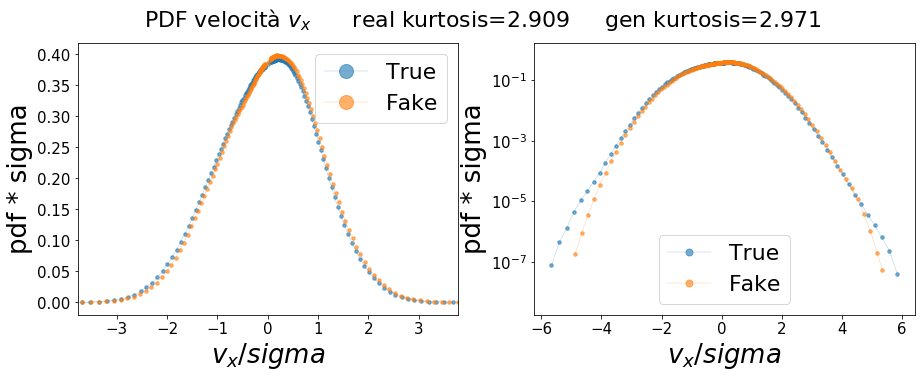

In [79]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))
hist, bin_edges = load_pdf('data/pdf_vx')
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
vel_std = 1.7192559430218903
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gen9.min(),gen9.max(),200,1e-1)
hist, bin_edges = np.histogram(gen9.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist *= vel_std
bin_edges /= vel_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF velocità $v_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.set_xlabel('$v_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-6.5,6.5])
ax1.legend(markerscale=4)
ax2.set_xlabel('$v_x$')
ax2.set_yscale('log')
ax2.set_ylim([1e-9,1])
ax2.set_ylabel('pdf')
ax2.legend(markerscale=2)

ax1n.set_xlabel('$v_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-6.5/vel_std,6.5/vel_std])
ax1n.legend(markerscale=4)
ax2n.set_xlabel('$v_x / sigma$')
ax2n.set_yscale('log')
ax2n.set_ylim([1e-9*vel_std,1*vel_std])
ax2n.set_ylabel('pdf * sigma')
ax2n.legend(markerscale=2)

#fig.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d0_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

In [80]:
gm = np.gradient(gen9,axis=1)

1.0017092626771908
1.0029199716326498


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


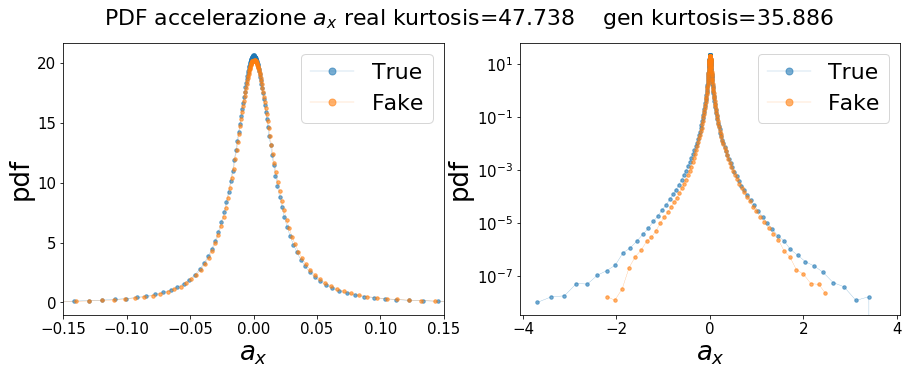

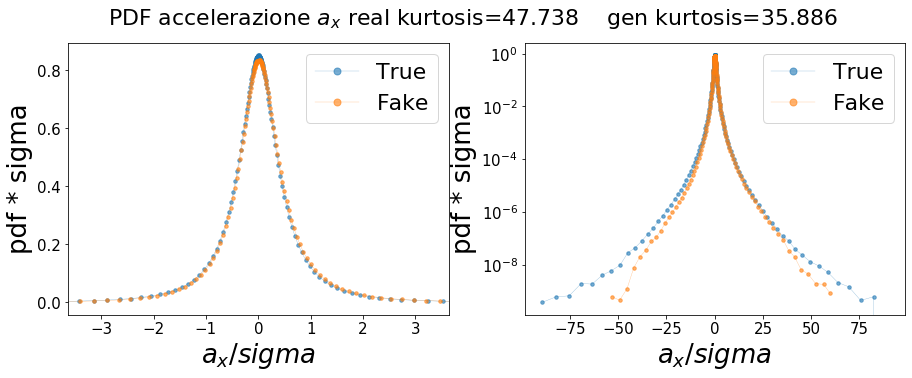

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_ax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
acc_std = 0.0412815564714219
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gm.min(),gm.max(),200,1e-3)
hist, bin_edges = np.histogram(gm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('$a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.15,0.15])
ax2.legend(markerscale=2)
ax2.set_xlabel('$a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('$a_x / sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.15/acc_std,0.15/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('$a_x / sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

#fig.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}.png', fmt='png', dpi=100)
#fign.savefig(f'plots/wgangp_{run}/gan_test_d1_{run}_{number}_n.png', fmt='png', dpi=100)
fig.show()
fign.show()

In [82]:
gmm = np.gradient(gm,axis=1)

1.0026846043833015
1.00351151686774


/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


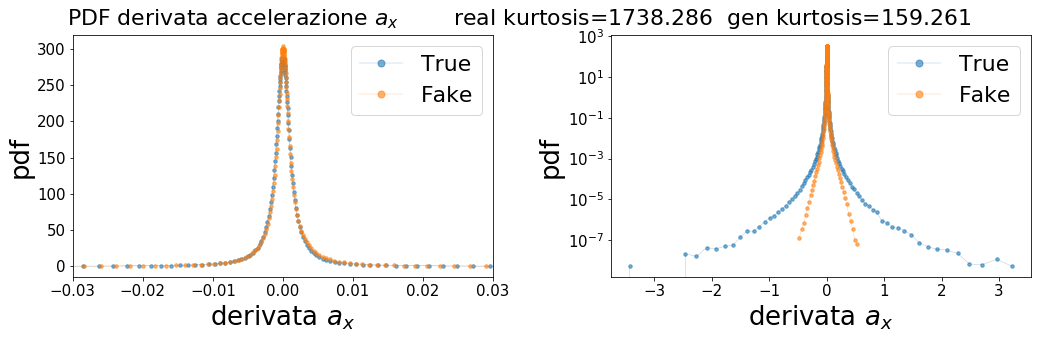

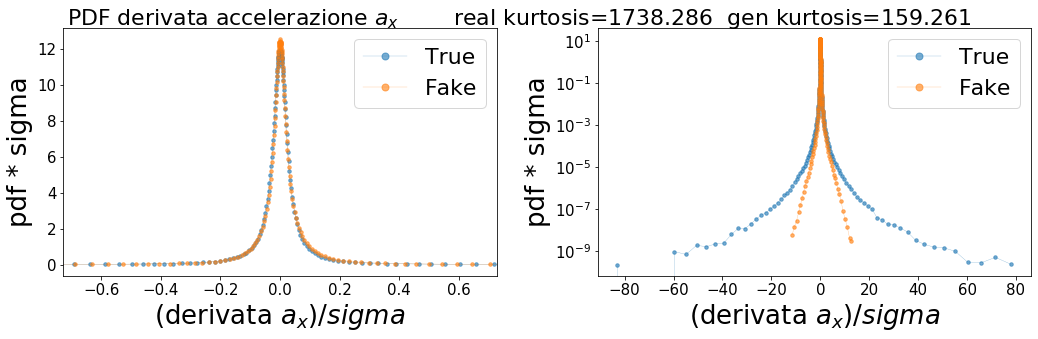

In [83]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))
fign, (ax1n, ax2n) = plt.subplots(1,2,figsize=(15,5))

hist, bin_edges = load_pdf('data/pdf_aax')
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
kurtosis_real = kurtosis(bin_edges, hist)
ax1.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
aacc_std = 0.007416499876515975
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='True', alpha=0.6, marker='.', lw=0.3, ms=7)

bins=create_log_bins(gmm.min(),gmm.max(),200,1e-4)
hist, bin_edges = np.histogram(gmm.flatten(), bins=bins, density=True)
for i in range(len(hist)):
    bin_edges[i] = (bin_edges[i]+bin_edges[i+1])/2.
kurtosis_gen = kurtosis(bin_edges, hist)
bin_edges = bin_edges[:-1]
a = 0.
for i in range(len(bin_edges)-1):
    a += hist[i]*(bin_edges[i+1]-bin_edges[i])
print(a)
ax1.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
# normalizzate
hist = hist * acc_std
bin_edges = bin_edges / acc_std
ax1n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)
ax2n.plot(bin_edges, hist, label='Fake', alpha=0.6, marker='.', lw=0.3, ms=7)

fig.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')
fign.suptitle(f'PDF derivata accelerazione $a_x$\treal kurtosis={kurtosis_real:.3f}\tgen kurtosis={kurtosis_gen:.3f}')

ax1.legend(markerscale=2)
ax1.set_xlabel('derivata $a_x$')
ax1.set_ylabel('pdf')
ax1.set_xlim([-0.03,0.03])
ax2.legend(markerscale=2)
ax2.set_xlabel('derivata $a_x$')
ax2.set_ylabel('pdf')
ax2.set_yscale('log')

ax1n.legend(markerscale=2)
ax1n.set_xlabel('(derivata $a_x )/ sigma$')
ax1n.set_ylabel('pdf * sigma')
ax1n.set_xlim([-0.03/acc_std,0.03/acc_std])
ax2n.legend(markerscale=2)
ax2n.set_xlabel('(derivata $a_x )/ sigma$')
ax2n.set_ylabel('pdf * sigma')
ax2n.set_yscale('log')

fig.tight_layout()
fign.tight_layout()
fig.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}.png', fmt='png', dpi=60)
fign.savefig(f'plots/wgangp_{run}/gan_test_d2_{run}_{number}_n.png', fmt='png', dpi=60)
fig.show()
fign.show()

[459730 334606 314846 456617 197500 467727  50153 152838 346872 431810]


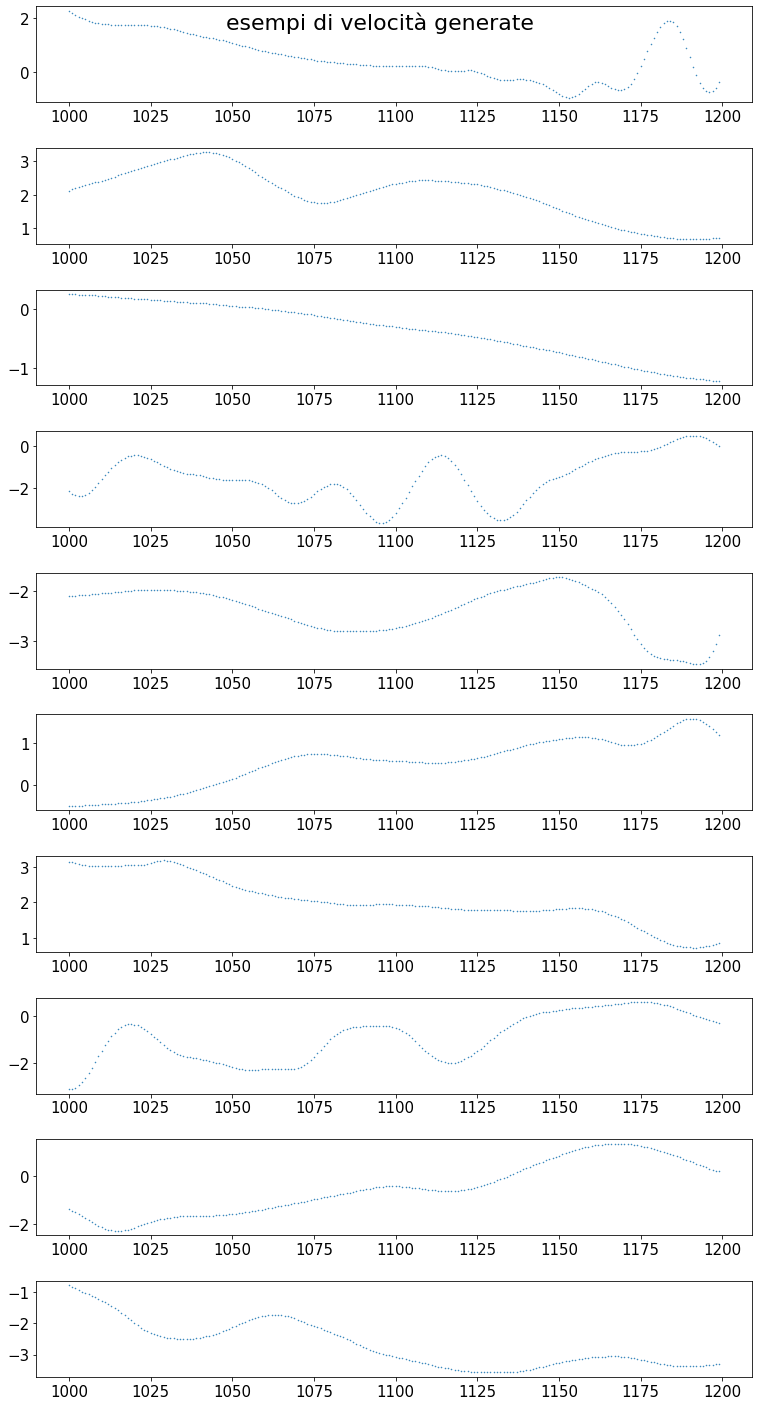

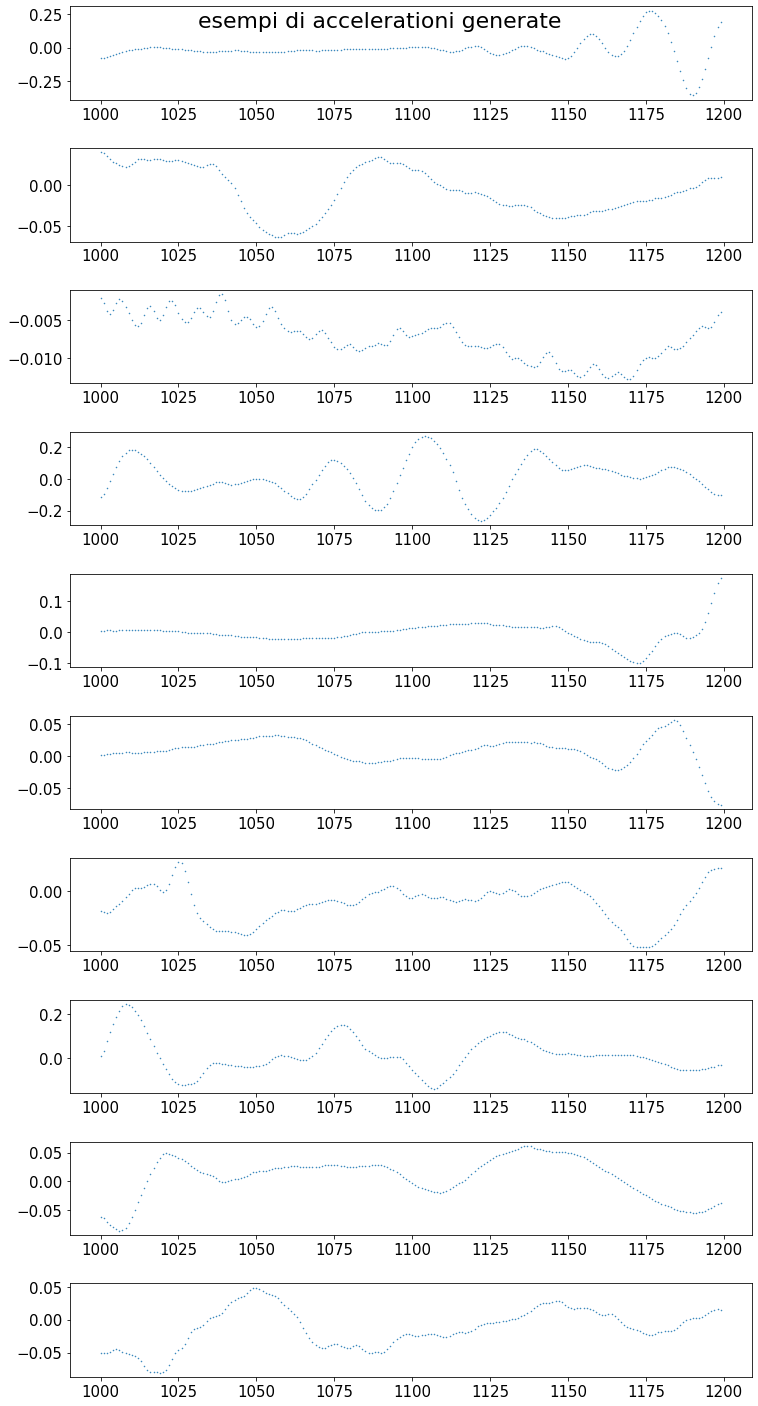

In [106]:
idx2 = np.random.randint(0, gen9.shape[0],10)
print(idx2)
start=1000
end=start+200
axis = np.arange(start,end)
gen_trajs = gen9[idx2,start:end]
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di velocità generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(axis,traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_vel_{run}_{number}_media.png', fmt='png', dpi=100)
plt.show()

gen_trajs = np.gradient(gen_trajs, axis=1)
plt.figure(figsize=(11,2*len(gen_trajs)))
plt.suptitle('esempi di accelerationi generate')

for i, traj in enumerate(gen_trajs):
    plt.subplot(len(gen_trajs), 1, i+1)
    plt.plot(axis,traj, lw=0, marker='.',ms=1)

plt.tight_layout()
plt.savefig(f'plots/wgangp_{run}/gan_test_gen_acc_{run}_{number}_media.png', fmt='png', dpi=100)
plt.show()

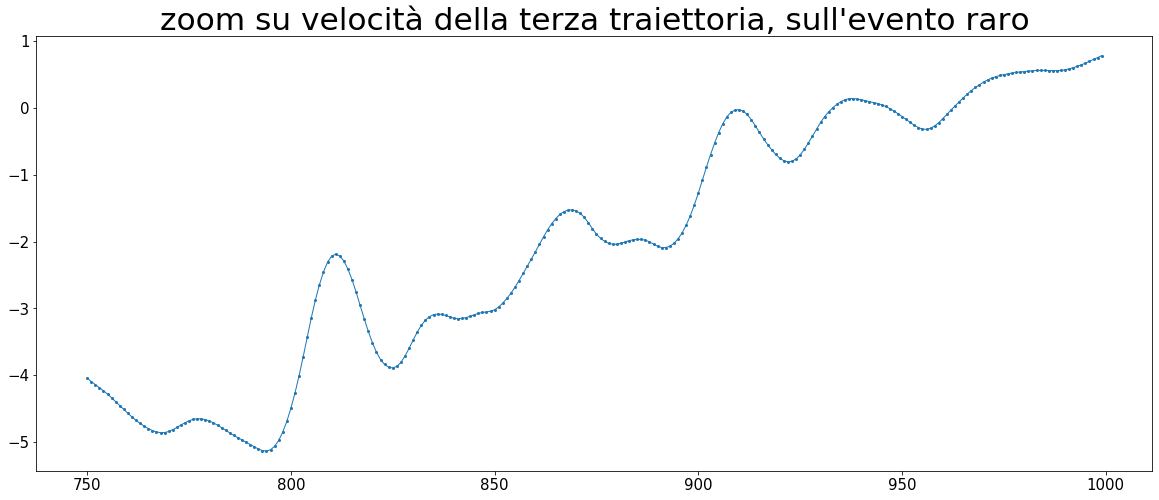

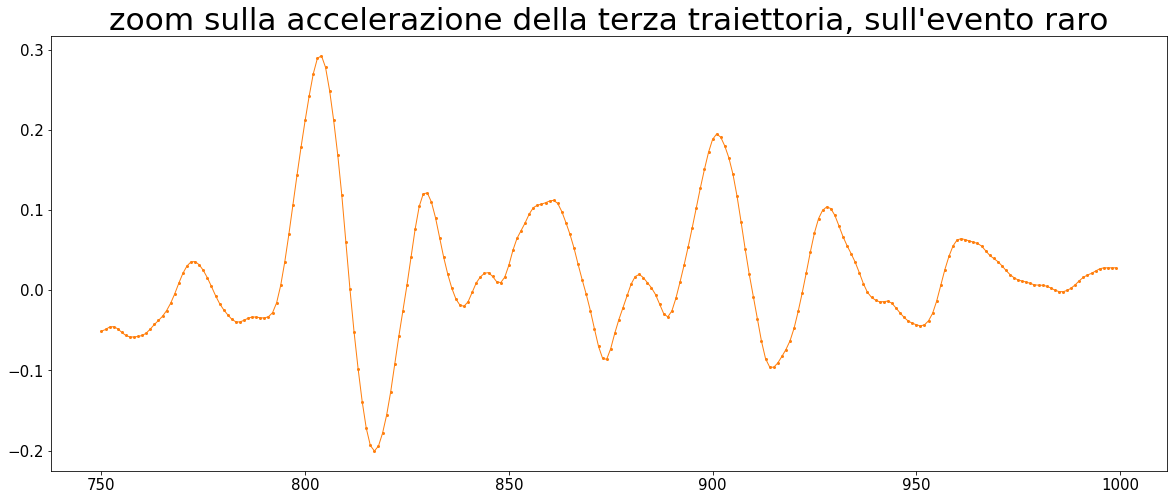

In [100]:
start=750
end=1000
plt.title("zoom su velocità della terza traiettoria, sull'evento raro")
plt.plot(np.arange(start,end),gen9[458300,start:end])
plt.show()
plt.title("zoom sulla accelerazione della terza traiettoria, sull'evento raro")
plt.plot(np.arange(start,end),np.gradient(gen9[458300,start:end],axis=0),color="C1")
plt.show()

# Matrici covarianza secondo e quarto ordine

In [12]:
db = np.load("../databases/velocities.npy")[:,:,0:1]

In [21]:
c = cov2(db)
cc = cov4(db)
#np.save("data/cij",c)
#np.save("data/c2ij",cc)

In [54]:
cn = cov2(gen)
ccn = cov4(gen)

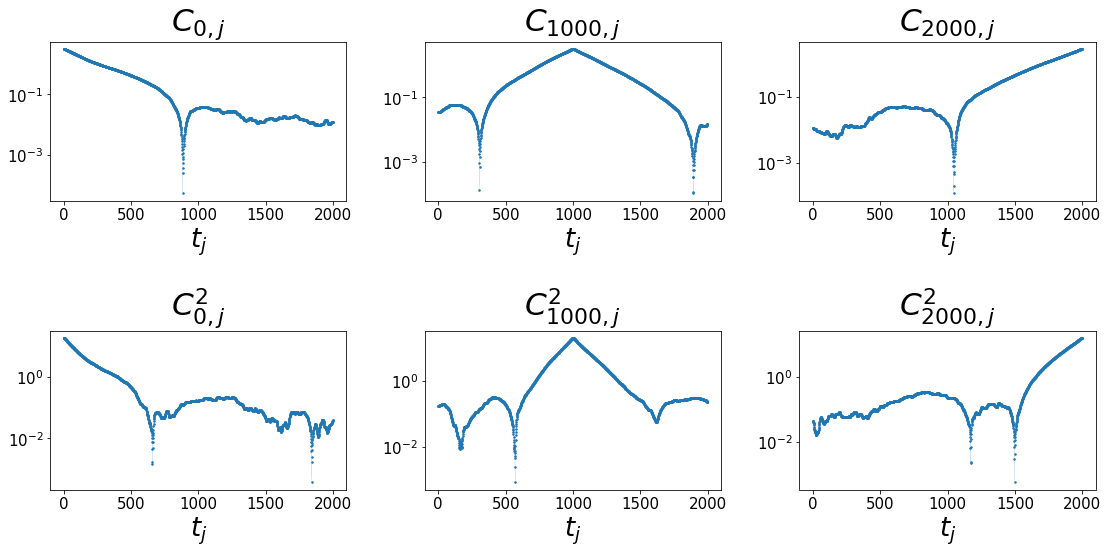

In [58]:
real_cov = np.abs(c)
plt.subplot(2,3,1)
plt.yscale("log")
plt.title("$C_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0])
plt.subplot(2,3,2)
plt.yscale("log")
plt.title("$C_{1000,j}$")
plt.plot(real_cov[:,1000])
plt.xlabel("$t_j$")
plt.subplot(2,3,3)
plt.yscale("log")
plt.title("$C_{2000,j}$")
plt.plot(real_cov[:,1999])
plt.xlabel("$t_j$")
real_cov = np.abs(cc)
plt.subplot(2,3,4)
plt.yscale("log")
plt.title("$C^2_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0])
plt.subplot(2,3,5)
plt.yscale("log")
plt.title("$C^2_{1000,j}$")
plt.plot(real_cov[:,1000])
plt.xlabel("$t_j$")
plt.subplot(2,3,6)
plt.yscale("log")
plt.title("$C^2_{2000,j}$")
plt.plot(real_cov[:,1999])
plt.xlabel("$t_j$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("corr_matrix",fmt="png",dpi=60)
plt.show()

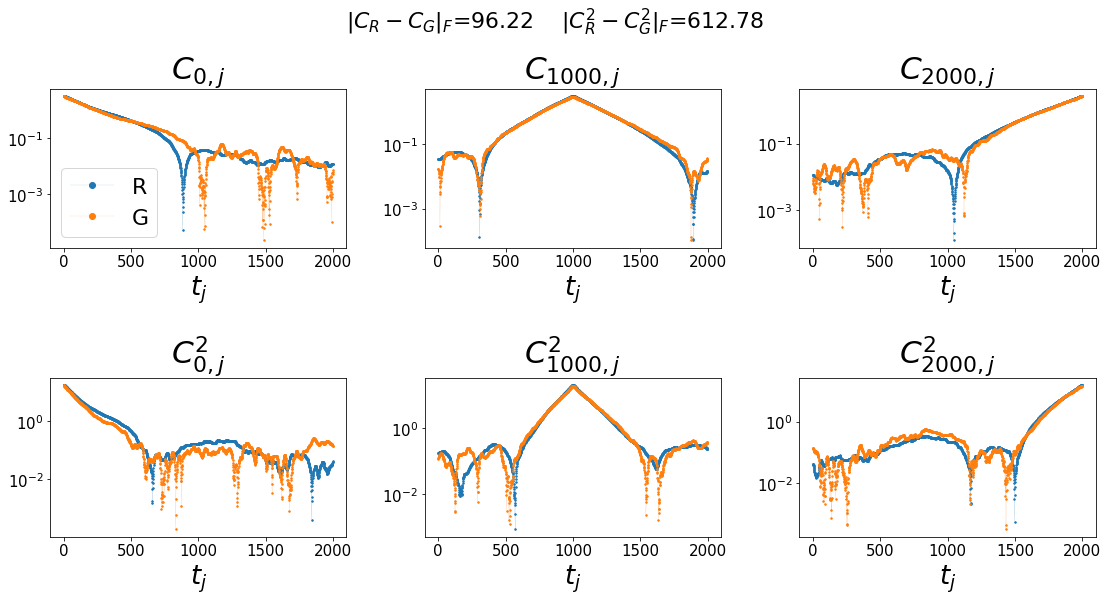

In [60]:
real_cov = np.abs(c)
gen_cov = np.abs(cn)
plt.subplot(2,3,1)
plt.yscale("log")
plt.suptitle("$|C_R-C_G|_F$=%.2f    $|C^2_R-C^2_G|_F$=%.2f"%(np.linalg.norm(c-cn),np.linalg.norm(cc-ccn)))
plt.title("$C_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0],label="R")
plt.plot(gen_cov[:,0],label="G")
plt.legend()
plt.subplot(2,3,2)
plt.yscale("log")
plt.title("$C_{1000,j}$")
plt.plot(real_cov[:,1000],label="R")
plt.plot(gen_cov[:,1000],label="G")
plt.xlabel("$t_j$")
plt.subplot(2,3,3)
plt.yscale("log")
plt.title("$C_{2000,j}$")
plt.plot(real_cov[:,1999],label="R")
plt.plot(gen_cov[:,1999],label="G")
plt.xlabel("$t_j$")
real_cov = np.abs(cc)
gen_cov = np.abs(ccn)
plt.subplot(2,3,4)
plt.yscale("log")
plt.title("$C^2_{0,j}$")
plt.xlabel("$t_j$")
plt.plot(real_cov[:,0],label="R")
plt.plot(gen_cov[:,0],label="G")
plt.subplot(2,3,5)
plt.yscale("log")
plt.title("$C^2_{1000,j}$")
plt.plot(real_cov[:,1000],label="R")
plt.plot(gen_cov[:,1000],label="G")
plt.xlabel("$t_j$")
plt.subplot(2,3,6)
plt.yscale("log")
plt.title("$C^2_{2000,j}$")
plt.plot(real_cov[:,1999],label="R")
plt.plot(gen_cov[:,1999],label="G")
plt.xlabel("$t_j$")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("corr_matrix_comp",fmt="png",dpi=60)
plt.show()

In [228]:
print("C  ",np.linalg.norm(c-cn))
print("C2  ",np.linalg.norm(cc-ccn))

C   204.6670961448938
C2   865.3144299651269


In [2]:
def cov4(db,npart=None):
    if npart == None:
        dbn = db
    else:
        idx = np.random.randint(0,db.shape[0],npart)
        dbn = db[idx]
    dbm = dbn - np.mean(dbn, axis=0)
    dbm=np.square(dbm[:,:,0])
    #print(dbm.shape[0])
    dbm=dbm - np.mean(dbm, axis=0)
    cc = np.dot(dbm.T,dbm) / (dbm.shape[0])
    return cc

def cov2(db,npart=None):
    if npart == None:
        dbn = db
    else:
        idx = np.random.randint(0,db.shape[0],npart)
        dbn = db[idx]
    dbm = dbn - np.sum(dbn, axis=0, keepdims=True)/(dbn.shape[0])
    dbm=dbm[:,:,0]
    #print(dbm.shape[0])
    cc = np.dot(dbm.T,dbm) / (dbm.shape[0])
    return cc

In [67]:
#db = np.load('../databases/velocities.npy')[:,:,0:1]
M = 10.273698864467972
m = -9.970374739869616
semidisp = (M-m)/2.
media = (M+m)/2.
#db = (db - media)/semidisp
#gen = (gen - media)/semidisp

In [103]:
bs = 500
idx = np.random.randint(0,gen.shape[0],bs)
cg = cov4(gen[idx])
print("mean cov4 g = ",np.mean(cg))
idx = np.random.randint(0,db.shape[0],bs)
cr = cov4(db[idx])
print("mean cov4 r = ",np.mean(cr))

mean cov4 g =  0.00016723678
mean cov4 r =  0.00018536380687594125


In [104]:
print(np.linalg.norm(cr-cg))

0.2664980591561458


# funzione che prende in input run e number e genera N velocità

In [19]:
def gen_traj(npart, run, it, noise=None):
    path = f'/scratch/scarpolini/lagrangian/wgangp/runs/{run}/{it}_gen.h5'
    gen = load_model(path)
    if noise.all==None: trajs = gen.predict(np.random.normal(0, 1, size=(npart, 100)))
    else: trajs = gen.predict(noise)
    return trajs

In [86]:
generator = load_model(f'/scratch/scarpolini/lagrangian/wgangp/runs/{51}/{1750}_gen.h5')

W0817 18:00:44.259496 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [139]:
print(noise)

[[ 2.53630682  0.46569284 -0.32617905 -0.12765858  0.4118141  -1.84626986
  -0.53547544  0.39821591  0.14227177  0.63545789  0.75181883  0.05158364
  -0.3807835   0.82757076 -0.46223526  1.09404466 -0.95066916  0.19423752
  -1.55395876  0.22964244 -0.62845285 -0.04535916 -0.18801521 -0.81434814
   1.26733786  0.85767169 -0.57912208  1.26158712  0.45325362  1.47110818
   1.87102905 -0.05198013  0.42128221 -1.32187197  0.53853728 -0.75889023
  -0.93539161  0.44995603 -0.51941314 -0.16525595  0.12558249  0.73348794
  -0.28250115  0.22954006 -0.12531988 -1.26193888  0.29268601 -0.34914712
   0.31165484 -0.8449366  -0.91830953  1.59497796  0.06203486 -0.34441735
   0.86098788 -1.12312355 -1.17025779  0.70880436 -0.21864584  0.8267046
   0.13514985  1.95928905 -1.22110025 -0.39319237  0.5783229  -1.9642952
  -1.61955253  0.07285863 -1.34480988 -0.97020035  0.19375287 -0.443506
   0.76080703  1.7712881   0.09828917  0.03397349  0.06607429 -2.76825178
   0.61584971  0.32260978 -0.76358166  2.4

In [137]:
noise = np.random.normal(0, 1, size=(1, 100))

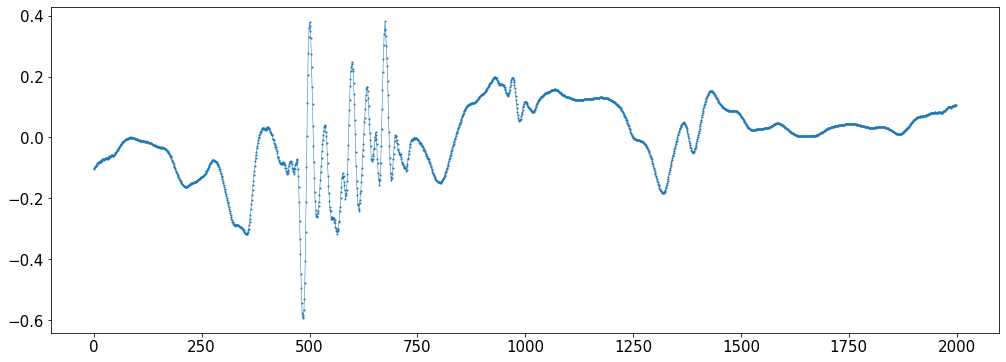

In [138]:
plt.plot(generator.predict(noise)[0])

# creo sequenza di generatori da caricare

In [142]:
jump = 250

numbers = np.arange(0,10000+jump, jump)
runs = [49]*len(numbers)
nn = numbers
rr = runs

numbers = np.arange(jump,2500+jump, jump)
runs = [50]*len(numbers)
nn = np.r_[nn, numbers]
rr = rr + runs

numbers = np.arange(jump,1750+jump, jump)
runs = [51]*len(numbers)
nn = np.r_[nn, numbers]
rr = rr + runs

for ii in range(len(rr)):
    print(rr[ii], nn[ii])

49 0
49 250
49 500
49 750
49 1000
49 1250
49 1500
49 1750
49 2000
49 2250
49 2500
49 2750
49 3000
49 3250
49 3500
49 3750
49 4000
49 4250
49 4500
49 4750
49 5000
49 5250
49 5500
49 5750
49 6000
49 6250
49 6500
49 6750
49 7000
49 7250
49 7500
49 7750
49 8000
49 8250
49 8500
49 8750
49 9000
49 9250
49 9500
49 9750
49 10000
50 250
50 500
50 750
50 1000
50 1250
50 1500
50 1750
50 2000
50 2250
50 2500
51 250
51 500
51 750
51 1000
51 1250
51 1500
51 1750


In [143]:
for ii in range(len(nn)):
    print(rr[ii], nn[ii])
    if ii>0: trajs = np.r_[trajs, gen_traj(1,rr[ii],nn[ii], noise=noise)]
    else: trajs = gen_traj(1,rr[ii],nn[ii], noise=noise)

49 0


W0817 18:03:49.766349 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 250


W0817 18:03:56.694785 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 500


W0817 18:04:03.630818 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 750


W0817 18:04:10.785688 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 1000


W0817 18:04:17.812428 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 1250


W0817 18:04:25.004385 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 1500


W0817 18:04:32.400640 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 1750


W0817 18:04:39.832423 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 2000


W0817 18:04:47.329864 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 2250


W0817 18:04:55.201172 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 2500


W0817 18:05:03.147617 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 2750


W0817 18:05:12.061474 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 3000


W0817 18:05:20.159667 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 3250


W0817 18:05:28.786134 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 3500


W0817 18:05:36.954552 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 3750


W0817 18:05:45.335906 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 4000


W0817 18:05:53.777048 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 4250


W0817 18:06:02.616492 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 4500


W0817 18:06:11.293335 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 4750


W0817 18:06:20.457574 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 5000


W0817 18:06:29.212651 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 5250


W0817 18:06:38.436897 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 5500


W0817 18:06:47.468575 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 5750


W0817 18:06:56.962280 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 6000


W0817 18:07:06.320894 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 6250


W0817 18:07:15.690720 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 6500


W0817 18:07:25.254144 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 6750


W0817 18:07:35.132863 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 7000


W0817 18:07:44.881268 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 7250


W0817 18:07:55.289242 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 7500


W0817 18:08:05.391142 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 7750


W0817 18:08:16.865759 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 8000


W0817 18:08:27.194116 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 8250


W0817 18:08:37.921253 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 8500


W0817 18:08:48.590266 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 8750


W0817 18:08:59.220926 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 9000


W0817 18:09:09.984106 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 9250


W0817 18:09:21.367639 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 9500


W0817 18:09:32.252758 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 9750


W0817 18:09:43.544445 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


49 10000


W0817 18:09:54.654450 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 250


W0817 18:10:06.236047 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 500


W0817 18:10:17.539984 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 750


W0817 18:10:29.243237 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 1000


W0817 18:10:40.854356 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 1250


W0817 18:10:52.776979 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 1500


W0817 18:11:04.760126 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 1750


W0817 18:11:16.826539 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 2000


W0817 18:11:28.647951 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 2250


W0817 18:11:40.878271 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


50 2500


W0817 18:11:52.981323 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 250


W0817 18:12:05.659308 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 500


W0817 18:12:17.952307 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 750


W0817 18:12:30.797601 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 1000


W0817 18:12:43.282317 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 1250


W0817 18:12:56.359786 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 1500


W0817 18:13:10.356133 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


51 1750


W0817 18:13:23.534320 47732888997376 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


# creo sequenza di plot

In [178]:
plt.rcParams['font.size'] = 26
#plt.rcParams['axes.labelsize'] = 10
#plt.rcParams['axes.labelweight'] = 'bold'
#plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 22
#plt.rcParams['image.cmap'] = 'jet'
#plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['lines.linewidth'] = 0.5
plt.rcParams['lines.markersize'] = 2
plt.rcParams['legend.markerscale'] = 4
plt.rcParams['lines.marker'] = '.'

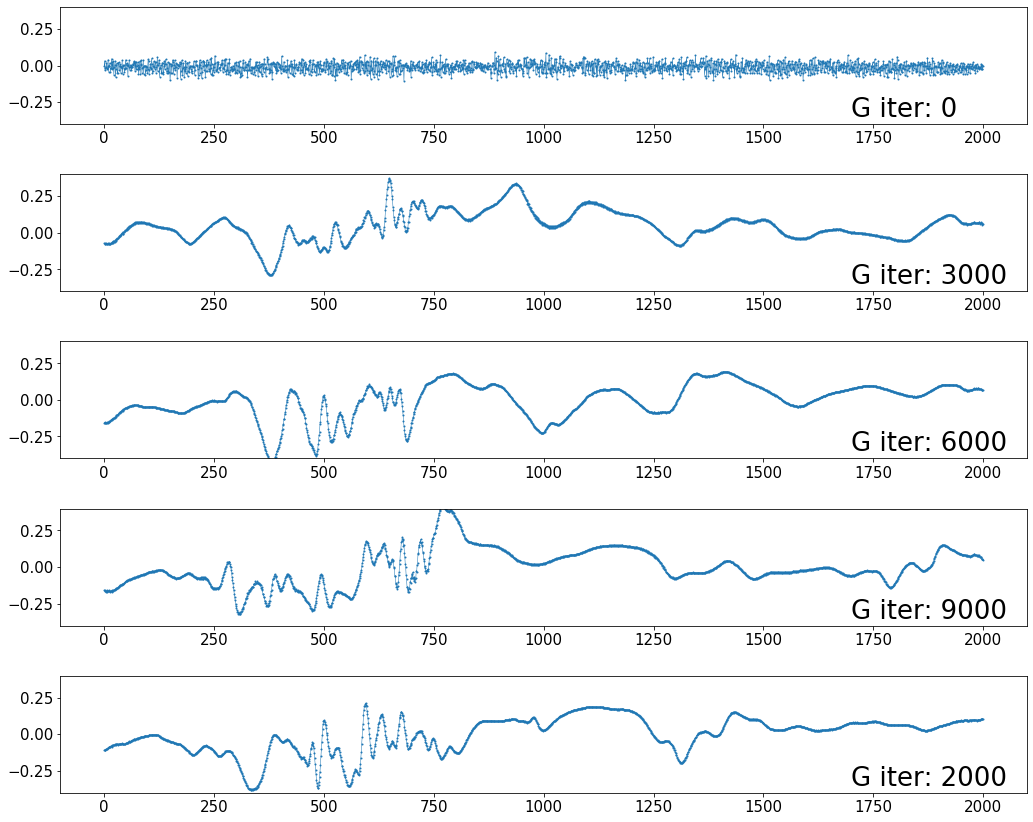

In [197]:
plots = 5
jumpp = (trajs.shape[0]+plots)//plots
for jj, ii in enumerate(np.arange(0,trajs.shape[0],jumpp)):
    plt.subplot(plots,1,jj+1)
    plt.ylim([-0.4, 0.4])
    plt.plot(trajs[ii])
    plt.text(1700,-0.35,'G iter: '+str(nn[ii]))
plt.tight_layout()
plt.show()

# creo gif

timestep 0
timestep 0
timestep 1
timestep 2
timestep 3
timestep 4
timestep 5
timestep 6
timestep 7
timestep 8
timestep 9
timestep 10
timestep 11
timestep 12
timestep 13
timestep 14
timestep 15
timestep 16
timestep 17
timestep 18
timestep 19
timestep 20
timestep 21
timestep 22
timestep 23
timestep 24
timestep 25
timestep 26
timestep 27
timestep 28
timestep 29
timestep 30
timestep 31
timestep 32
timestep 33
timestep 34
timestep 35
timestep 36
timestep 37
timestep 38
timestep 39
timestep 40
timestep 41
timestep 42
timestep 43
timestep 44
timestep 45
timestep 46
timestep 47
timestep 48
timestep 49
timestep 50
timestep 51
timestep 52
timestep 53
timestep 54
timestep 55
timestep 56
timestep 57
timestep 0


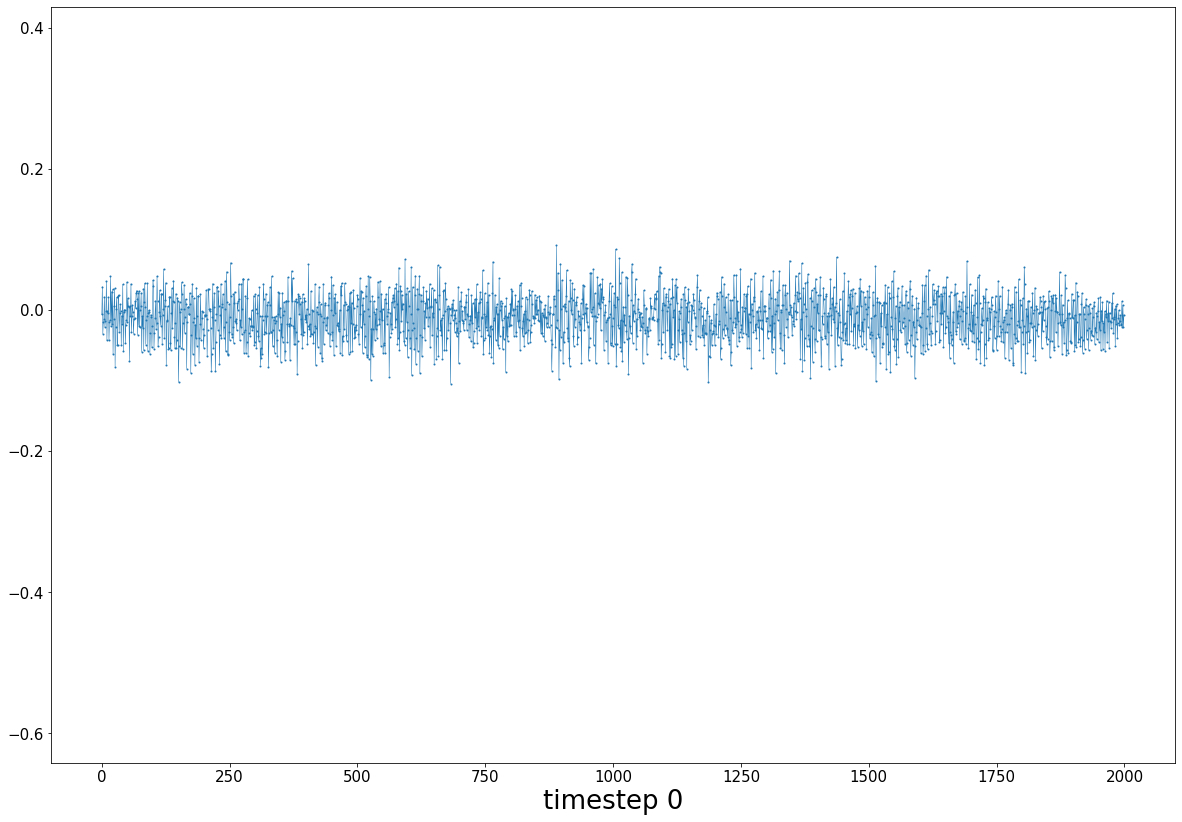

In [151]:
from matplotlib.animation import FuncAnimation

def update(ii):
    label = 'timestep {0}'.format(ii)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(trajs[ii])
    ax.set_xlabel(label)
    return line, ax

fig, ax = plt.subplots()
fig.set_tight_layout(True)

line, = ax.plot(trajs[-1])
line.set_ydata(trajs[0])

anim = FuncAnimation(fig, update, frames=np.arange(0, trajs.shape[0]), interval=600)
anim.save('line.gif', dpi=60, writer='imagemagick')